In [172]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df=pd.read_csv("online_sales_dataset.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium




| Column Name        | Description                  | Benefit                          |
|--------------------|------------------------------|----------------------------------|
| InvoiceNo          | Unique identifier for each invoice (transaction number) | Identifies each sales transaction uniquely |
| StockCode          | Product code (SKU) that distinguishes each product | Links the transaction to a specific product |
| Description        | Brief description of the product | Clarifies the product type in a human-readable way |
| Quantity           | Number of units sold in the transaction | Shows the sales volume  |
| InvoiceDate        | Date and time of the transaction | Provides the temporal dimension for sales analysis |
| UnitPrice          | Price per unit of the product | Determines the product cost (negative may indicate return or error) |
| CustomerID         | Unique identifier for each customer | Links the transaction to a customer (if available) |
| Country            | Customer’s country           | Shows the geographical distribution |
| Discount           | Discount applied to the transaction | Indicates the discount percentage or value |
| PaymentMethod      | Payment method               | Reveals payment preferences       |
| ShippingCost       | Shipping cost for the transaction | Affects the total cost           |
| Category           | Product category             | Classifies products for category analysis |
| SalesChannel       | Sales channel                | Differentiates between online and in-store sales |
| ReturnStatus       | Return status                | Indicates whether the product was returned or not |
| ShipmentProvider   | Shipping provider            | Specifies the shipping company used |
| WarehouseLocation  | Warehouse location           | Identifies the shipment source    |
| OrderPriority      | Order priority               | Shows the operational importance of the order |




In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [175]:
df.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [176]:
#49782
df[["InvoiceNo"]].shape

(49782, 1)

In [177]:
df[["InvoiceNo"]].shape

(49782, 1)

In [178]:
df["CustomerID"].duplicated().sum()

14392

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'White Mug'),
  Text(1, 0, 'Headphones'),
  Text(2, 0, 'Desk Lamp'),
  Text(3, 0, 'USB Cable'),
  Text(4, 0, 'Office Chair'),
  Text(5, 0, 'Notebook'),
  Text(6, 0, 'Wireless Mouse'),
  Text(7, 0, 'Blue Pen'),
  Text(8, 0, 'Wall Clock'),
  Text(9, 0, 'T-shirt'),
  Text(10, 0, 'Backpack')])

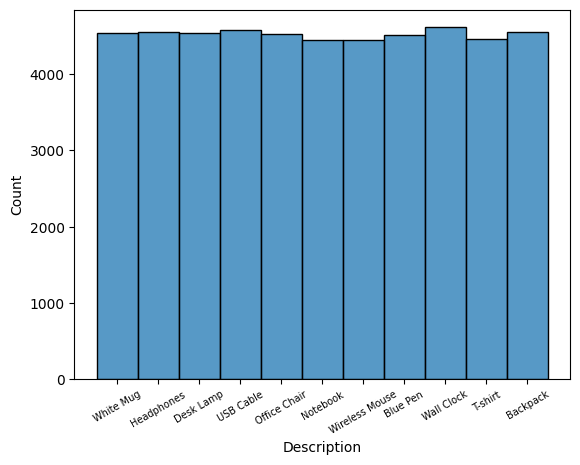

In [179]:
sns.histplot(df["Description"])
plt.xticks(rotation=30)
plt.xticks(fontsize=7)

In [180]:
df.loc[df["Quantity"]<0,["Quantity","UnitPrice"]]

,Quantity,UnitPrice
4,-30,-68.11
144,-2,34.06
147,-26,-72.33
167,-19,-3.61
176,-3,85.95
...,...,...
49730,-7,-57.31
49739,-40,-51.34
49749,-36,12.21
49760,-34,10.34


(array([44888.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4894.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

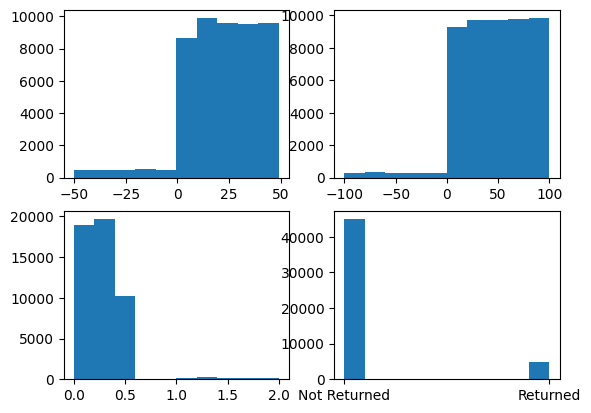

In [181]:
fig,axes,=plt.subplots(nrows=2,ncols=2)
axes[0,0].hist(df["Quantity"])
axes[0,1].hist(df["UnitPrice"])
axes[1,0].hist(df["Discount"])
axes[1,1].hist(df["ReturnStatus"])

In [182]:
df.loc[(df["Quantity"]<0) & (df["ReturnStatus"]=="Not Returned"),["ReturnStatus"]]="Returned"

In [183]:
df.loc[df["UnitPrice"]<0,"UnitPrice"]=df["UnitPrice"].abs()

In [184]:
df.loc[df["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority


In [185]:
df["Discount"].describe()

count    49782.000000
mean         0.275748
std          0.230077
min          0.000000
25%          0.130000
50%          0.260000
75%          0.380000
max          1.999764
Name: Discount, dtype: float64

In [186]:
df.loc[df["Discount"]>1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Returned,FedEx,NaN,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,72.33,NaN,Netherlands,1.972087,paypall,NaN,Electronics,In-store,Returned,Royal Mail,NaN,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00,3.61,NaN,Italy,1.052254,Credit Card,NaN,Apparel,In-store,Returned,UPS,NaN,High
199,867595,SKU_1343,White Mug,-2,2020-01-09 07:00,96.08,NaN,Portugal,1.702088,Bank Transfer,NaN,Accessories,Online,Returned,FedEx,NaN,Low
262,937291,SKU_1936,Wall Clock,-16,2020-01-11 22:00,73.60,NaN,Germany,1.535440,Credit Card,NaN,Electronics,Online,Returned,DHL,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49622,733594,SKU_1811,Notebook,-50,2025-08-29 14:00,32.91,NaN,United States,1.608233,paypall,NaN,Electronics,In-store,Returned,Royal Mail,NaN,Medium
49691,553510,SKU_1943,T-shirt,-4,2025-09-01 11:00,74.57,NaN,France,1.306613,Credit Card,NaN,Stationery,Online,Returned,Royal Mail,NaN,Low
49695,855821,SKU_1500,Wireless Mouse,-11,2025-09-01 15:00,18.88,NaN,Portugal,1.569082,Bank Transfer,NaN,Furniture,In-store,Returned,FedEx,NaN,Low
49718,745888,SKU_1224,T-shirt,-2,2025-09-02 14:00,84.25,NaN,United States,1.420665,Bank Transfer,NaN,Accessories,In-store,Returned,Royal Mail,NaN,Medium


Text(0, 0.5, 'dis')

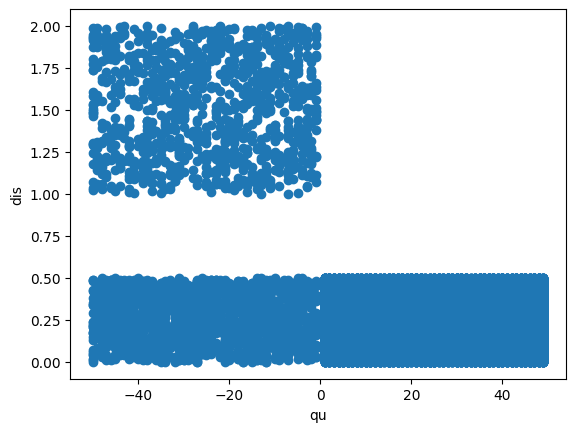

In [187]:
plt.scatter(x=df["Quantity"],y=df["Discount"])
plt.xlabel("qu")
plt.ylabel("dis")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'White Mug'),
  Text(1, 0, 'Headphones'),
  Text(2, 0, 'Desk Lamp'),
  Text(3, 0, 'USB Cable'),
  Text(4, 0, 'Office Chair'),
  Text(5, 0, 'Notebook'),
  Text(6, 0, 'Wireless Mouse'),
  Text(7, 0, 'Blue Pen'),
  Text(8, 0, 'Wall Clock'),
  Text(9, 0, 'T-shirt'),
  Text(10, 0, 'Backpack')])

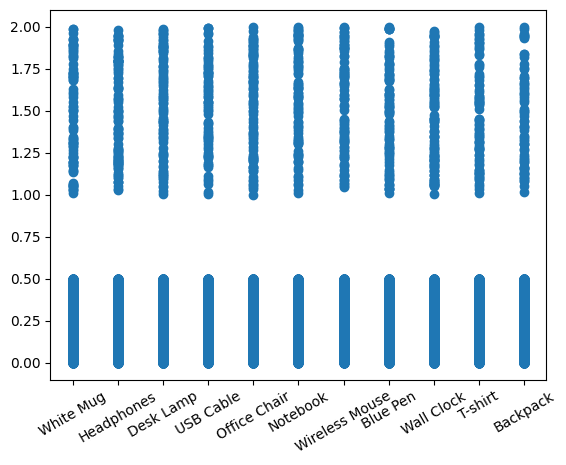

In [188]:
plt.scatter(x=df["Description"],y=df["Discount"])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Accessories'),
  Text(3, 0, 'Stationery'),
  Text(4, 0, 'Furniture')])

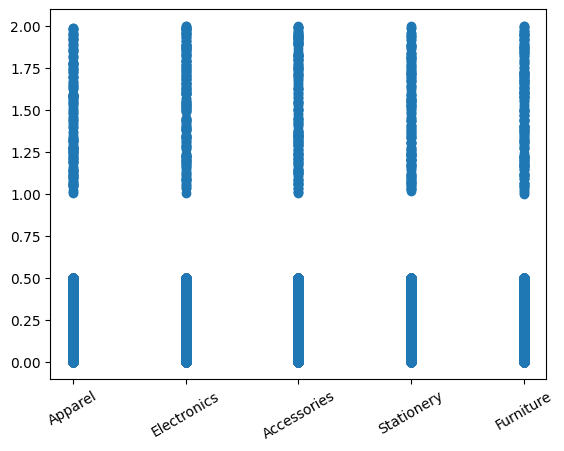

In [189]:
plt.scatter(x=df["Category"],y=df["Discount"])
plt.xticks(rotation=30)

<Axes: >

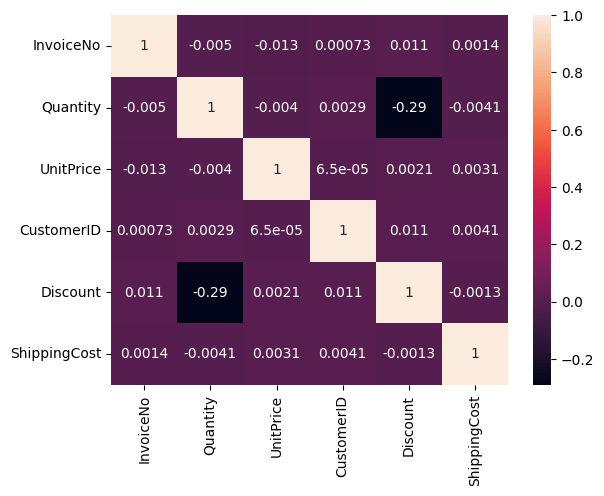

In [190]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [191]:
a=df.loc[df["Quantity"]>0,["Discount"]]
print(a.describe())
print("----------------")
b=df.loc[df["Quantity"]<0,["Discount"]]
print(b.describe())
print("----------------")
print(df["Discount"].describe())

           Discount
count  47293.000000
mean       0.250463
std        0.144324
min        0.000000
25%        0.130000
50%        0.250000
75%        0.380000
max        0.500000
----------------
          Discount
count  2489.000000
mean      0.756167
std       0.648211
min       0.000000
25%       0.220000
50%       0.420000
75%       1.365547
max       1.999764
----------------
count    49782.000000
mean         0.275748
std          0.230077
min          0.000000
25%          0.130000
50%          0.260000
75%          0.380000
max          1.999764
Name: Discount, dtype: float64


In [192]:
a.median()[0]

C:\Users\nice\AppData\Local\Temp\ipykernel_19124\469637883.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.median()[0]


0.25

In [193]:
df.loc[df["Discount"]>1,["Discount"]]=a.median()[0]

C:\Users\nice\AppData\Local\Temp\ipykernel_19124\834341684.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[df["Discount"]>1,["Discount"]]=a.median()[0]


In [194]:
df["Discount"].max()

0.5

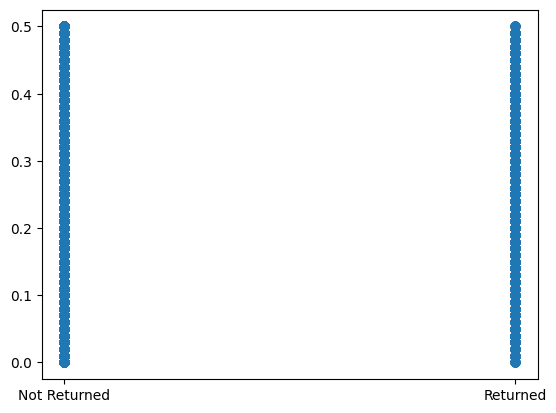

In [195]:
plt.scatter(x=df["ReturnStatus"],y=df["Discount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x15702110980>,
 'caps': [<matplotlib.lines.Line2D at 0x15702110ec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15702110710>],
 'medians': [<matplotlib.lines.Line2D at 0x15702111430>],
 'fliers': [<matplotlib.lines.Line2D at 0x157021116d0>],
 'means': []}

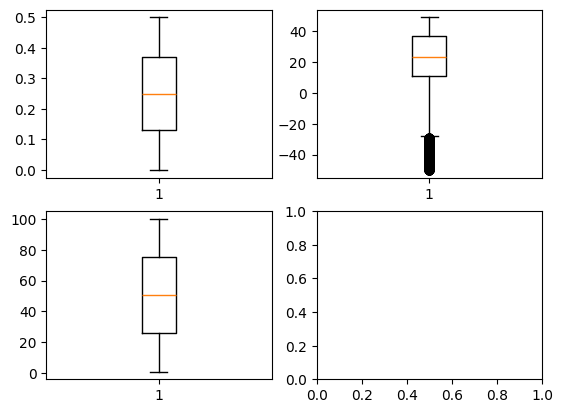

In [196]:
fig,axes=plt.subplots(nrows=2,ncols=2)
axes[0,0].boxplot(df["Discount"])
axes[1,0].boxplot(df["UnitPrice"])
axes[0,1].boxplot(df["Quantity"])

<Axes: >

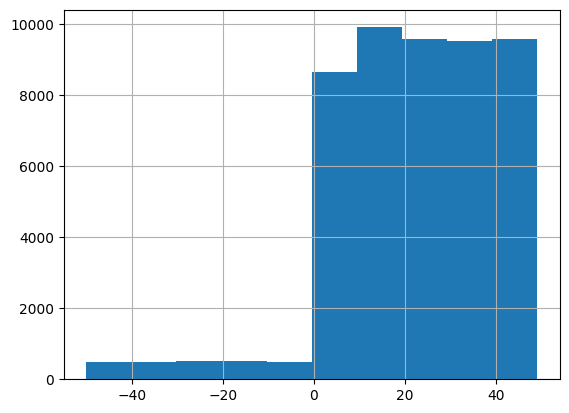

In [197]:
df["Quantity"].hist()

In [198]:
df.loc[df["Quantity"]<-20,["Quantity"]]

,Quantity
4,-30
147,-26
292,-26
332,-38
341,-39
...,...
49623,-28
49739,-40
49749,-36
49760,-34


In [199]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,68.11,NaN,United Kingdom,0.25,Bank Transfer,NaN,Electronics,In-store,Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


<Axes: >

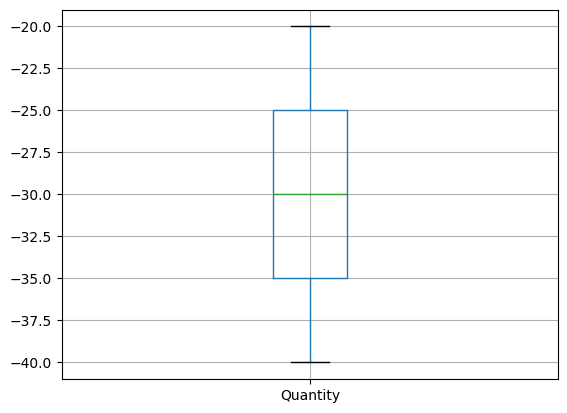

In [200]:
b=df.loc[(df["Quantity"]<=-20) & (df["Quantity"]>=-40),["Quantity"]]
b.boxplot()

In [201]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [202]:
df["Month"]=df["InvoiceDate"].dt.month
df["Year"]=df["InvoiceDate"].dt.year

In [203]:
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

<Axes: xlabel='WarehouseLocation', ylabel='Country'>

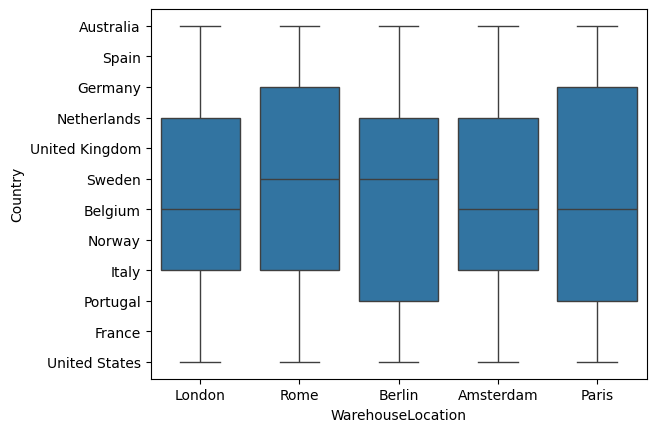

In [204]:
sns.boxplot(x=df["WarehouseLocation"],y=df["Country"])

In [205]:
a=df.loc[df["WarehouseLocation"].isna(), ["Country","WarehouseLocation"]]
b=df.loc[df["WarehouseLocation"].notna(), ["Country","WarehouseLocation"]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Norway'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'United States'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'France')])

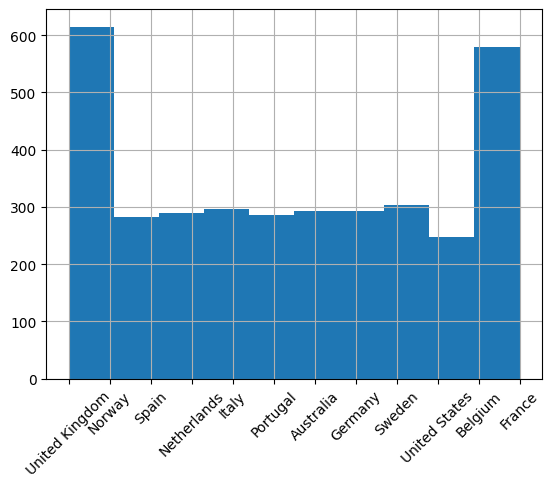

In [206]:
a["Country"].hist()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Sweden'),
  Text(5, 0, 'Belgium'),
  Text(6, 0, 'Norway'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States')])

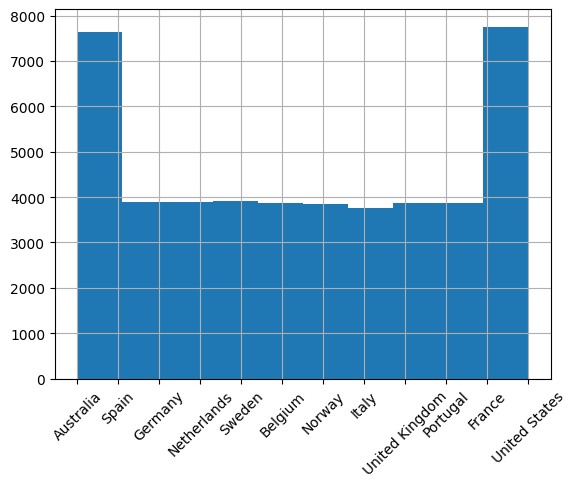

In [207]:
b["Country"].hist()
plt.xticks(rotation=45)

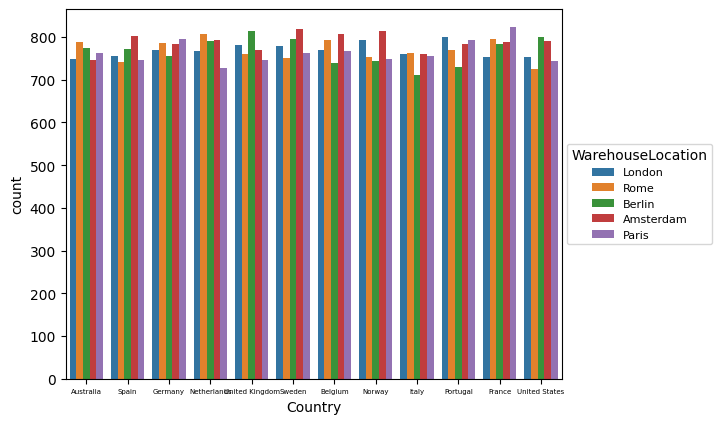

In [208]:
b=sns.countplot(x="Country", hue="WarehouseLocation", data=df)
plt.xticks(fontsize=5)
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

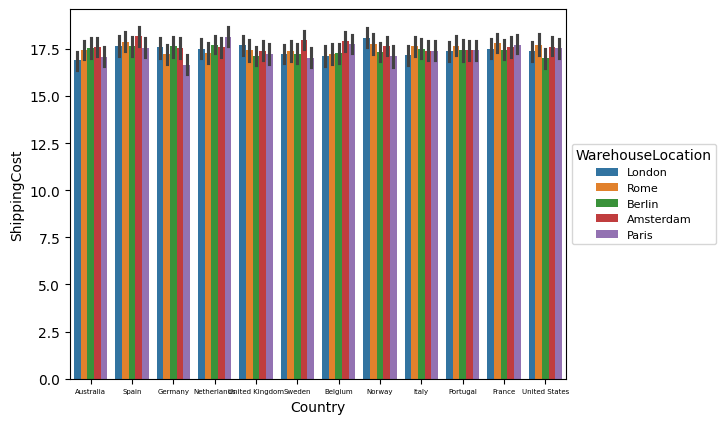

In [209]:
b=sns.barplot(x=df["Country"], hue=df["WarehouseLocation"],y=df["ShippingCost"])
plt.xticks(fontsize=5)
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States')])

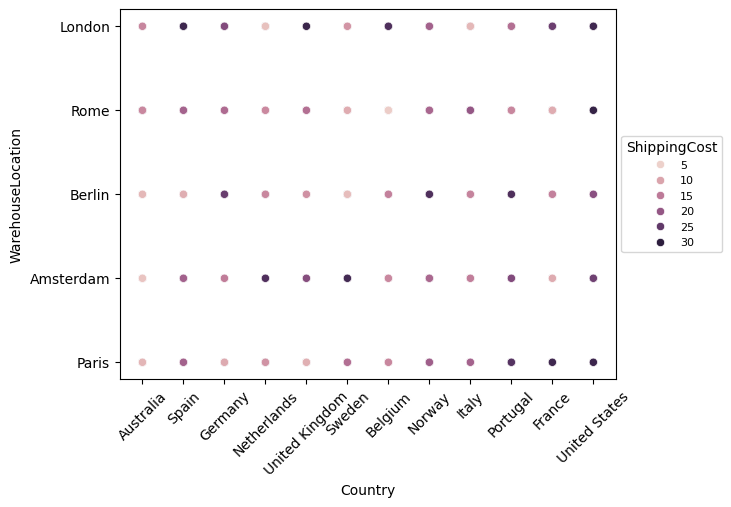

In [210]:
b=sns.scatterplot(x=df["Country"],y=df["WarehouseLocation"],hue=df["ShippingCost"])
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.xticks(rotation=45)


In [211]:
dict_country=df.groupby("Country")["WarehouseLocation"].apply(lambda x: x.mode()[0]).to_dict()
dict_country

{'Australia': 'Rome',
 'Belgium': 'Amsterdam',
 'France': 'Paris',
 'Germany': 'Paris',
 'Italy': 'Rome',
 'Netherlands': 'Rome',
 'Norway': 'Amsterdam',
 'Portugal': 'London',
 'Spain': 'Amsterdam',
 'Sweden': 'Amsterdam',
 'United Kingdom': 'Berlin',
 'United States': 'Berlin'}

In [212]:
df.loc[df["WarehouseLocation"].isna(),"WarehouseLocation"]=df.loc[df["WarehouseLocation"].isna(),"Country"].map(dict_country)

In [213]:
df["WarehouseLocation"].isna().sum()

0

In [214]:
df.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation       0
OrderPriority           0
Month                   0
Year                    0
dtype: int64

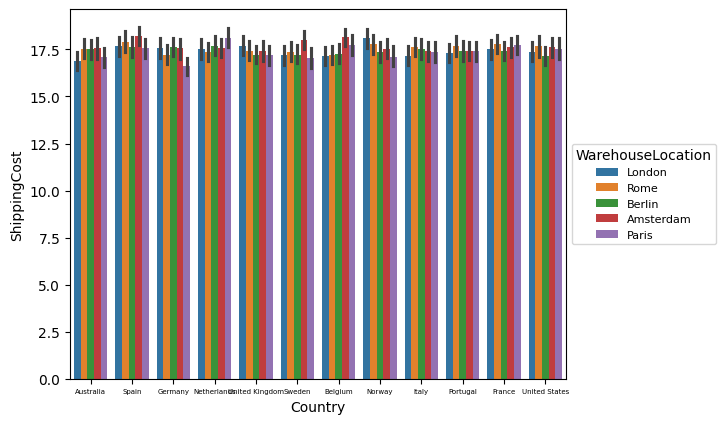

In [215]:
b=sns.barplot(x=df["Country"], hue=df["WarehouseLocation"],y=df["ShippingCost"])
plt.xticks(fontsize=5)
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

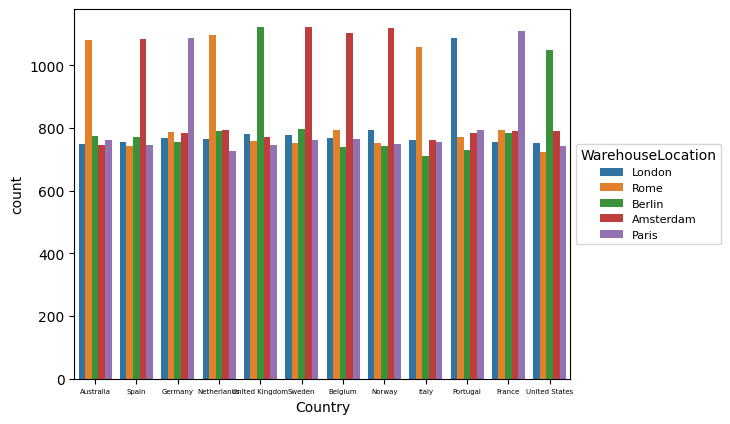

In [216]:
b=sns.countplot(x="Country", hue="WarehouseLocation", data=df)
plt.xticks(fontsize=5)
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

{'whiskers': [<matplotlib.lines.Line2D at 0x15705106ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x15705107500>,
 'boxes': [<matplotlib.lines.Line2D at 0x157047465a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15705107ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15705107d40>],
 'means': []}

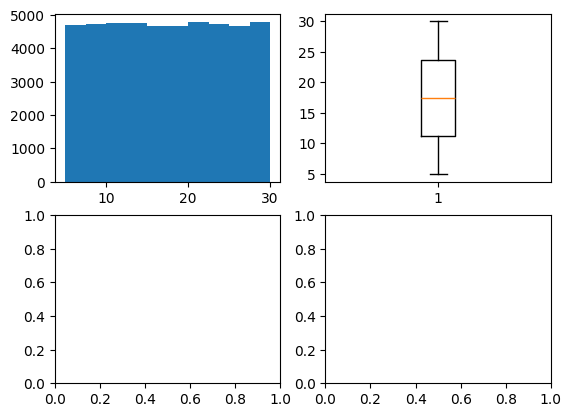

In [217]:
fig,axes=plt.subplots(nrows=2,ncols=2)
axes[0,0].hist(df["ShippingCost"])
axes[0,1].boxplot(df["ShippingCost"].dropna())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States')])

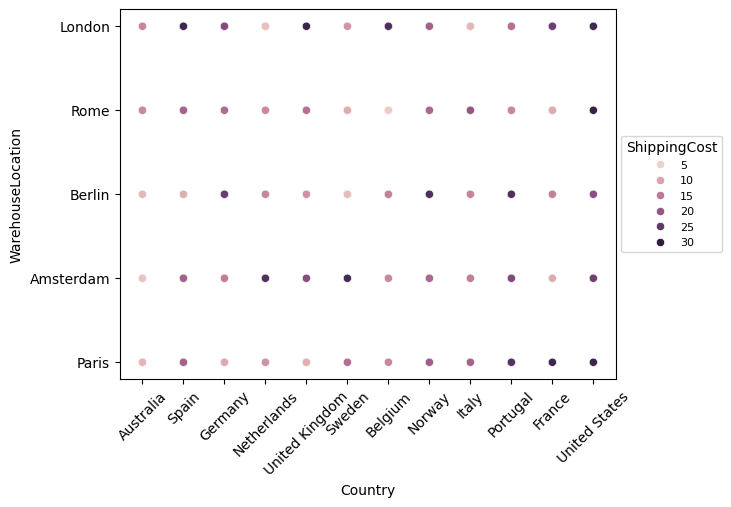

In [218]:
b=sns.scatterplot(x=df["Country"],y=df["WarehouseLocation"],hue=df["ShippingCost"])
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.xticks(rotation=45)


<Axes: xlabel='WarehouseLocation', ylabel='ShippingCost'>

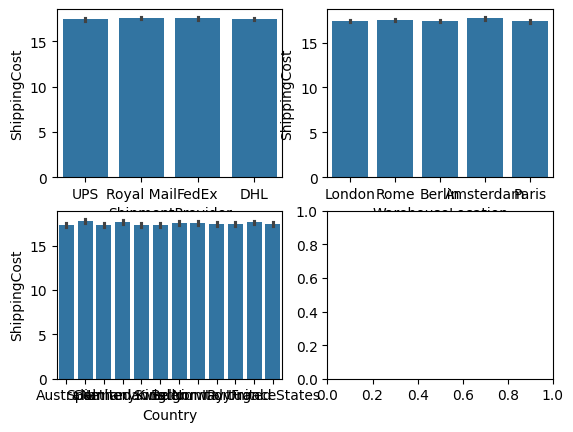

In [219]:
fig,axes=plt.subplots(nrows=2,ncols=2)
sns.barplot(x=df["ShipmentProvider"], y=df["ShippingCost"], ax=axes[0, 0])
sns.barplot(x=df["Country"], y=df["ShippingCost"], ax=axes[1, 0])
sns.barplot(x=df["WarehouseLocation"], y=df["ShippingCost"], ax=axes[0, 1])




In [220]:
df.loc[(df["Country"] == df["WarehouseLocation"]) & (df["ShippingCost"] > 10), "ShippingCost"] = 10

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States')])

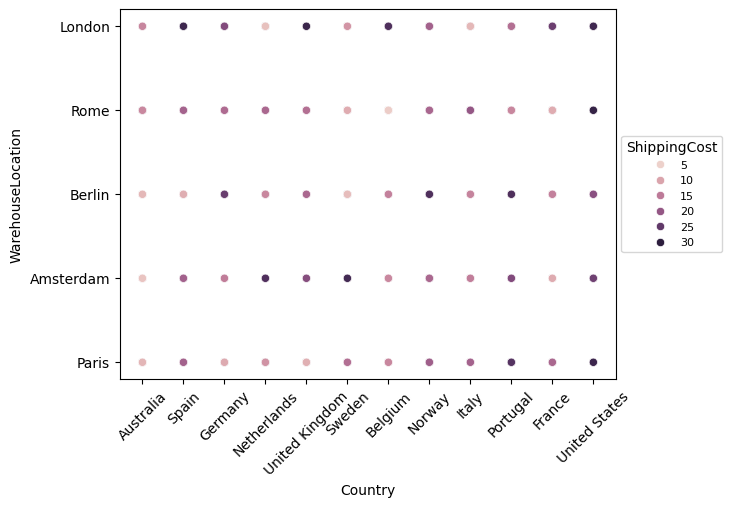

In [225]:
b=sns.scatterplot(x=df["Country"],y=df["WarehouseLocation"],hue=df["ShippingCost"])
sns.move_legend(b, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.xticks(rotation=45)


In [221]:
print(df.groupby(df["Country"])[["ShippingCost"]].mean().mean())
print(df.groupby(df["WarehouseLocation"])[["ShippingCost"]].mean().mean())
print(df.groupby(df["ShipmentProvider"])[["ShippingCost"]].mean().mean())


ShippingCost    17.494552
dtype: float64
ShippingCost    17.492449
dtype: float64
ShippingCost    17.494365
dtype: float64


In [222]:
df["ShippingCost"]=df["ShippingCost"].fillna(17.49)

<Axes: >

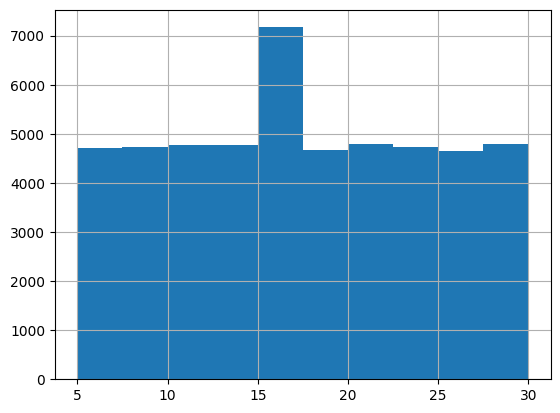

In [223]:
df["ShippingCost"].hist()

<Axes: ylabel='ShippingCost'>

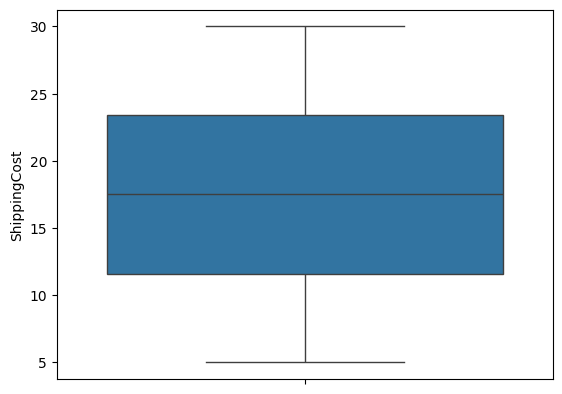

In [224]:
sns.boxplot(df["ShippingCost"])